# Step 1: Data Collection & Understanding 📊🧠

In [18]:
# Importing pandas for data handling
import pandas as pd
# Pandas makes data cleaning and analysis faster and easier
# pandas can handle large datasets efficiently
class DataLoader:
    """
    This class is responsible for loading the dataset and providing an initial exploratory summary.
    
    Attributes:
        file_path (str): Path to the dataset file.
        df (DataFrame): Loaded dataset.
    """

    def __init__(self, file_path):
        """
        Initializes the DataLoader with the path to the dataset.
        
        Parameters:
            file_path (str): Path to the CSV dataset file.
        """
        self.file_path = file_path
        self.df = None

    def load_data(self):
        """
        Loads the dataset from the provided file path and prints important initial insights.
        
        Returns:
            DataFrame: The loaded dataset.
        """
        print("\nDataset Loading...")
        print("-" * 100)

        # Load the dataset
        self.df = pd.read_csv(self.file_path)
        
        # Print shape of the dataset (rows, columns)
        print("\nDataset Loaded Successfully!")
        print("➡ Shape of Dataset:", self.df.shape)
        print("-" * 100)

        # Print the data types of each column
        print(" Data Types:\n")
        print(self.df.dtypes)
        print("-" * 100)

        # Display first 5 rows of the dataset
        print("First 5 Rows:\n")
        print(self.df.head())
        print("-" * 100)

        # Display missing values in the dataset
        print("Missing Values (Column-wise):\n")
        print(self.df.isnull().sum())
        print("-" * 100)

        # Show statistical summary of numeric features
        print("Statistical Summary (Numerical Columns):\n")
        print(self.df.describe().T)
        print("-" * 100)

        return self.df


loader = DataLoader("heart.csv")
df = loader.load_data()




Dataset Loading...
----------------------------------------------------------------------------------------------------

Dataset Loaded Successfully!
➡ Shape of Dataset: (918, 12)
----------------------------------------------------------------------------------------------------
 Data Types:

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
----------------------------------------------------------------------------------------------------
First 5 Rows:

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M         

# Step 2: Preprocessing, Univariate & Bivariate Analysis

Starting Data Preprocessing...
----------------------------------------------------------------------------------------------------
Categorical Variables Encoded.
----------------------------------------------------------------------------------------------------
Data Preprocessing Completed Successfully.
----------------------------------------------------------------------------------------------------
Univariate Analysis Started...
----------------------------------------------------------------------------------------------------


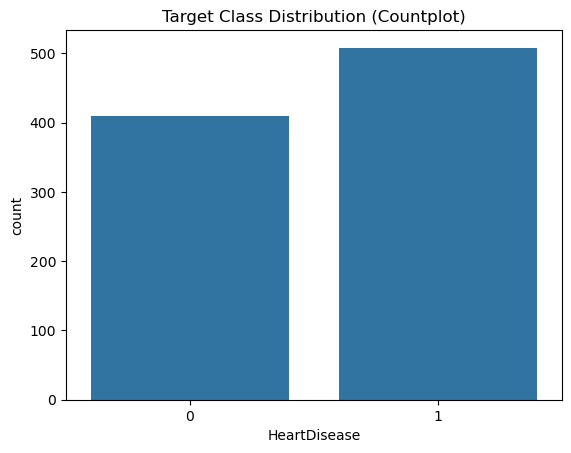

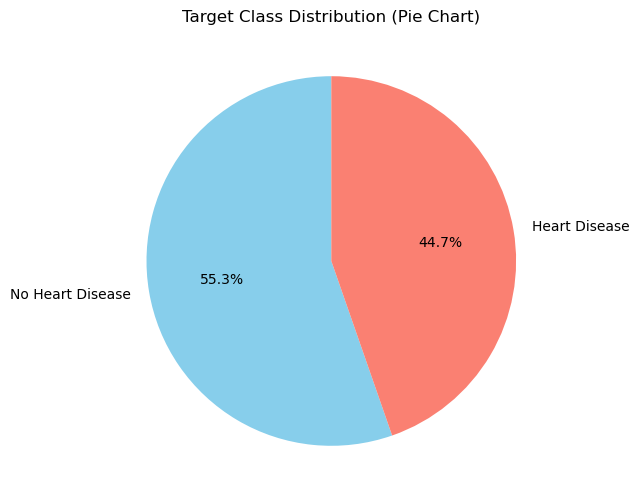

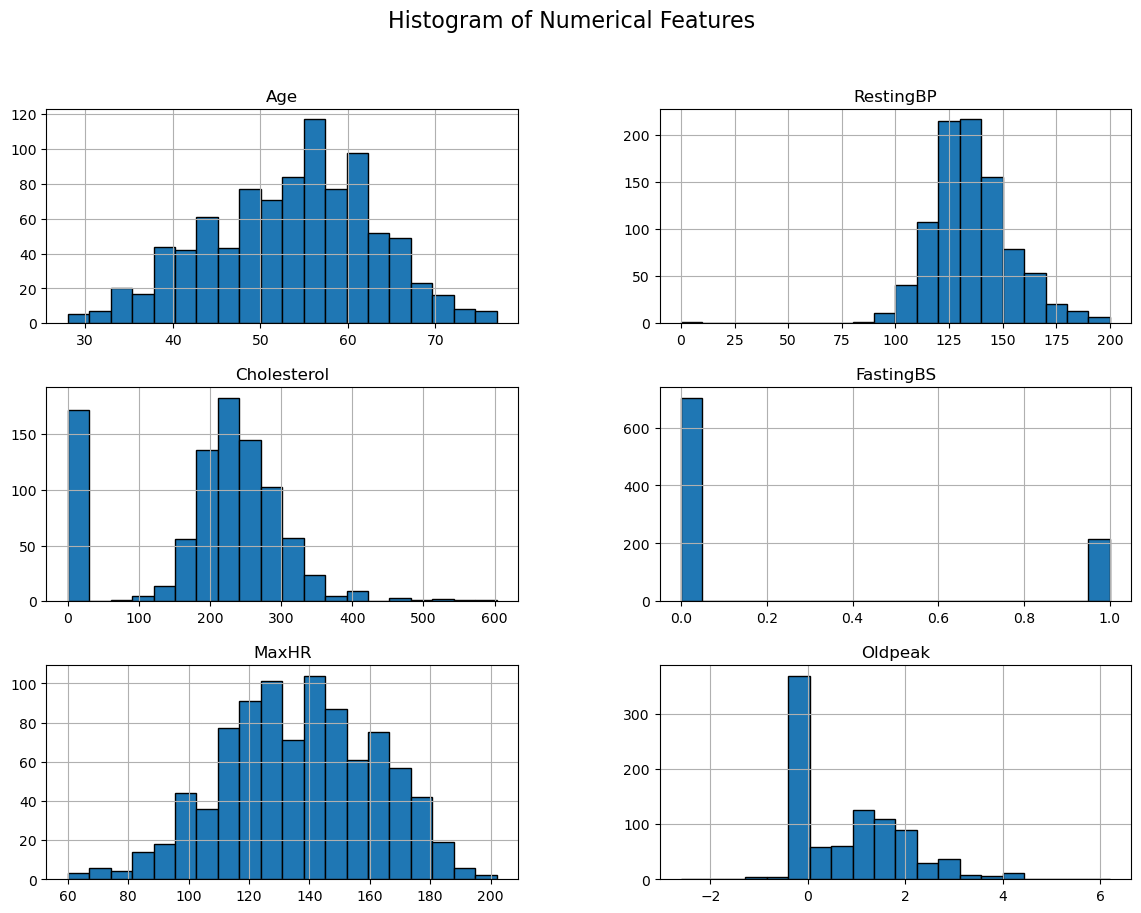

HeartDisease
1    508
0    410
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Bivariate Analysis Started...
----------------------------------------------------------------------------------------------------


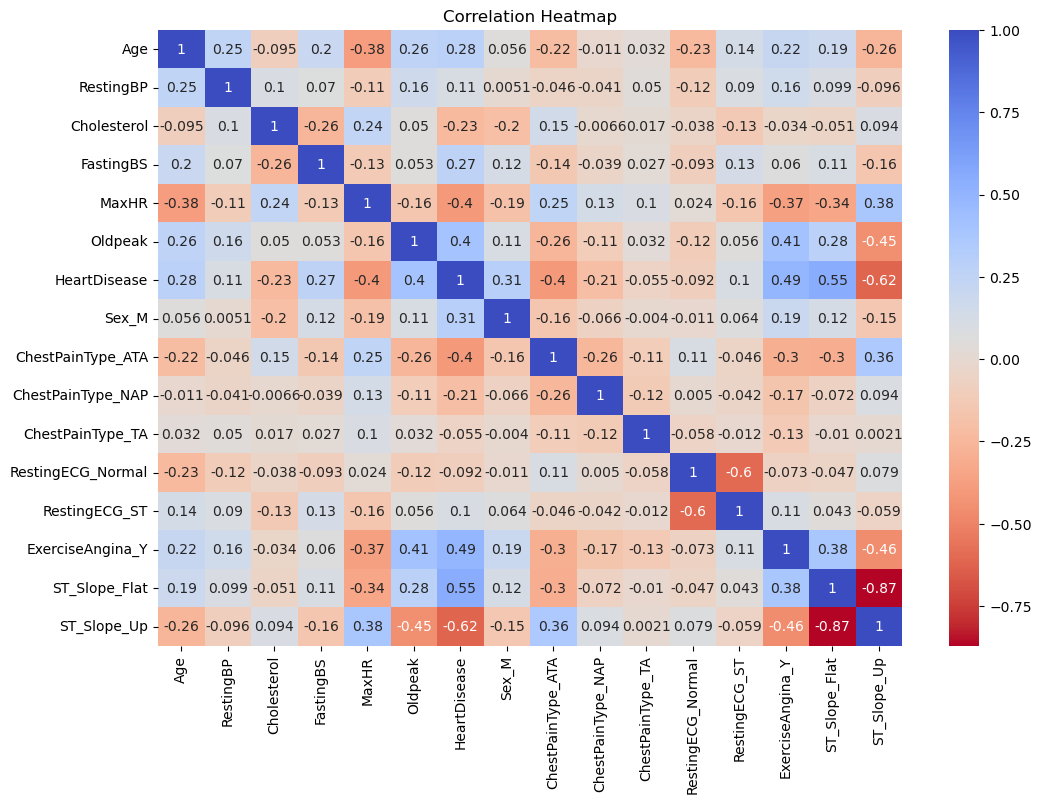

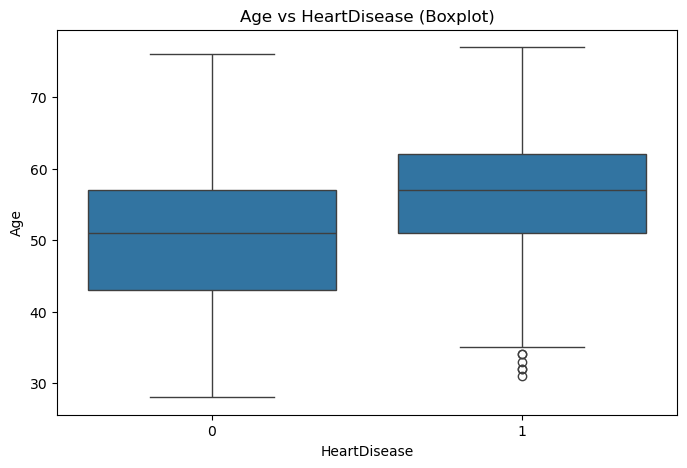

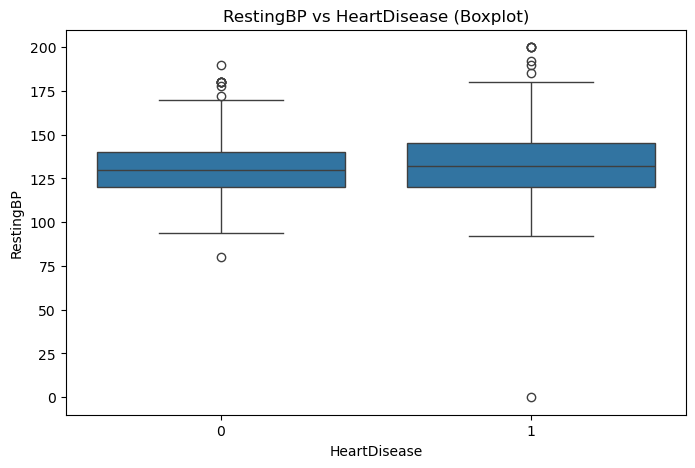

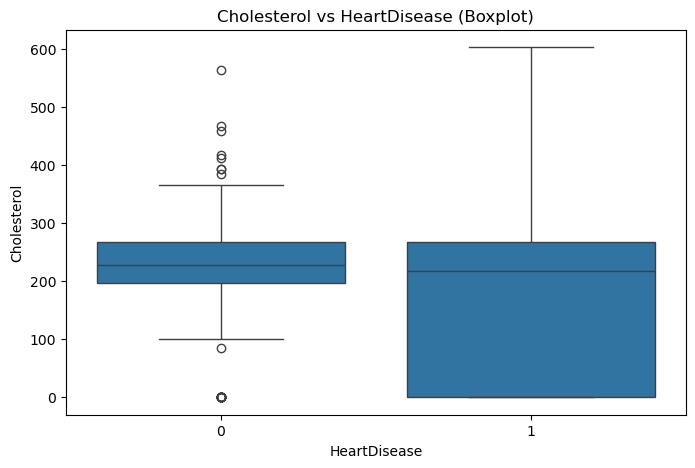

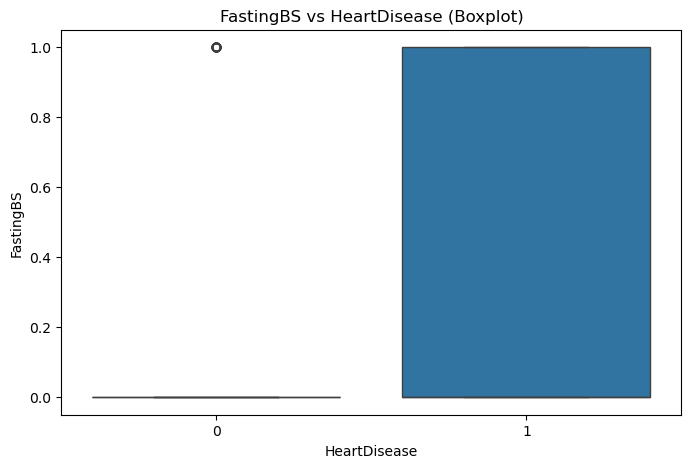

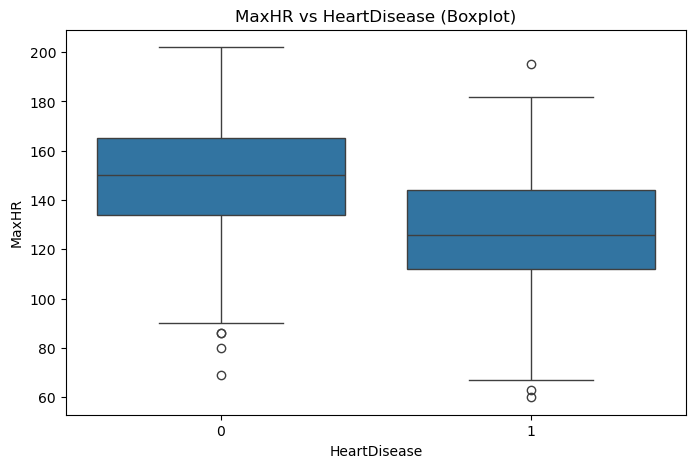

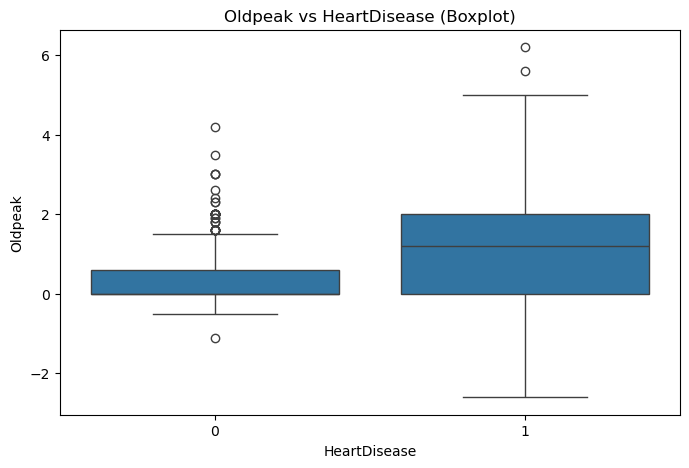

----------------------------------------------------------------------------------------------------


In [19]:
import seaborn as sns #	Built on top of matplotlib, seaborn makes it easy to create beautiful statistical visualizations like heatmaps, countplots, and more.
import matplotlib.pyplot as plt # Low-level plotting library for creating visualizations (e.g., bar charts, line graphs, scatter plots). Often works together with seaborn.
import numpy as np 	# Provides numerical operations and supports fast array and matrix operations. Often used with pandas for numerical data.
from sklearn.preprocessing import StandardScaler # From Scikit-learn, this class standardizes features by removing the mean and scaling to unit variance (mean = 0, std = 1).
# Crucial for machine learning algorithms that rely on feature scaling.

class DataPreprocessor:
    """
    This class handles preprocessing, univariate analysis, and bivariate analysis of the dataset.
    """

    def __init__(self, df):
        self.df = df

    def preprocess(self):
        """
        Handles missing values, encodes categorical variables, and returns the processed dataframe.
        """
        print("Starting Data Preprocessing...")
        print("-" * 100)

        # Handling missing values (if any)
        if self.df.isnull().sum().sum() > 0:
            self.df = self.df.fillna(self.df.median(numeric_only=True))
            print("Missing values filled with median of respective columns.")
        
        # Encoding categorical features
        self.df = pd.get_dummies(self.df, drop_first=True)
        print("Categorical Variables Encoded.")
        print("-" * 100)

        print("Data Preprocessing Completed Successfully.")
        print("-" * 100)
        return self.df

    def univariate_analysis(self):
        """
        Performs univariate analysis including countplots, pie charts, and histograms of numerical features.
        """
        print("Univariate Analysis Started...")
        print("-" * 100)

        # Countplot of Target Variable
        sns.countplot(x='HeartDisease', data=self.df)
        plt.title("Target Class Distribution (Countplot)")
        plt.show()

        # Pie Chart of Target Variable
        target_counts = self.df['HeartDisease'].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(target_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
        plt.title("Target Class Distribution (Pie Chart)")
        plt.show()

        # Histograms of Numerical Features
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns.drop('HeartDisease')
        self.df[numeric_cols].hist(bins=20, figsize=(14, 10), edgecolor='black')
        plt.suptitle("Histogram of Numerical Features", fontsize=16)
        plt.show()

        print(self.df['HeartDisease'].value_counts())
        print("-" * 100)

    def bivariate_analysis(self):
        """
        Performs bivariate analysis including correlation heatmap and boxplots of numerical features vs target.
        """
        print("Bivariate Analysis Started...")
        print("-" * 100)

        # Correlation Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm_r')
        plt.title("Correlation Heatmap")
        plt.show()

        # Boxplots for Numerical Features vs Target
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns.drop('HeartDisease')
        for col in numeric_cols:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x='HeartDisease', y=col, data=self.df)
            plt.title(f"{col} vs HeartDisease (Boxplot)")
            plt.show()

        # Optional Pairplot for smaller datasets (commented out)
        # sns.pairplot(self.df, hue='HeartDisease', diag_kind='hist')
        # plt.show()

        print("-" * 100)



preprocessor = DataPreprocessor(df)
df = preprocessor.preprocess()
preprocessor.univariate_analysis()
preprocessor.bivariate_analysis()


# Step 3: Data Splitting ✂

In [20]:
from sklearn.model_selection import train_test_split # Splits your dataset into Training and Testing sets
from sklearn.preprocessing import StandardScaler # Standardizes/Scales your numerical features to mean = 0 and standard deviation = 1.

class DataSplitter:
    """
    Splits the dataset into training and testing sets and applies feature scaling.
    """

    def __init__(self, df):
        self.df = df

    def split(self):
        # Step 1: Separate Features and Target Variable
        X = self.df.drop('HeartDisease', axis=1)
        y = self.df['HeartDisease']

        # Step 2: Train-Test Split (70% training, 30% testing)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )

        # Step 3: Apply Feature Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Step 4: Display Shape of Data
        print("Data Split Completed:")
        print(f"Training Set Shape: {X_train.shape}")
        print(f"Testing Set Shape:  {X_test.shape}")
        print("Data Scaled Successfully.")
        print("-" * 100)

        return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Example Usage
splitter = DataSplitter(df)
X_train, X_test, y_train, y_test, scaler = splitter.split()


Data Split Completed:
Training Set Shape: (642, 15)
Testing Set Shape:  (276, 15)
Data Scaled Successfully.
----------------------------------------------------------------------------------------------------


# Step 4: Model Training (SVM) and Evaluation 🤖

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

class SVMTrainer:
    """
    Trains and evaluates a Support Vector Machine (SVM) classifier.
    """

    def __init__(self):
        self.model = None

    def train(self, X_train, y_train, kernel='linear'):
        """
        Train an SVM model on the provided training data.
        
        Parameters:
            X_train: Training features
            y_train: Training target labels
            kernel: Kernel type ('linear', 'rbf', 'poly', etc.)
        """
        self.model = SVC(kernel=kernel)
        self.model.fit(X_train, y_train)
        print("Model Training Completed.")
        print("-" * 100)
        return self.model

    def evaluate(self, model, X_test, y_test):
        """
        Evaluate the trained model on test data.
        
        Parameters:
            model: Trained model object
            X_test: Testing features
            y_test: Actual target labels for test data
        """
        print("Model Evaluation Results")
        print("-" * 100)
        y_pred = model.predict(X_test)
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
        print("\nClassification Report:\n")
        print(classification_report(y_test, y_pred))
        print("-" * 100)

# Example Usage
trainer = SVMTrainer()
model = trainer.train(X_train, y_train, kernel='linear')
trainer.evaluate(model, X_test, y_test)


Model Training Completed.
----------------------------------------------------------------------------------------------------
Model Evaluation Results
----------------------------------------------------------------------------------------------------
Accuracy Score: 0.8732

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.92      0.86      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276

----------------------------------------------------------------------------------------------------


# Step 5: Model Saving and Loading using Pickle 📦

In [22]:
import pickle

class ModelManager:
    """
    Handles saving and loading of trained ML models using pickle.
    """

    def save_model(self, model, scaler, filename='heart_disease_svm_model.pkl'):
        """
        Saves the trained model and scaler to a file.
        
        Parameters:
            model: Trained machine learning model
            scaler: Scaler object used for data preprocessing
            filename: Name of the file to save
        """
        with open(filename, 'wb') as f:
            pickle.dump((model, scaler), f)
        print(f"Model Saved as '{filename}'")
        print("-" * 100)

    def load_model(self, filename='heart_disease_svm_model.pkl'):
        """
        Loads the trained model and scaler from a file.
        
        Returns:
            model: The trained machine learning model
            scaler: The scaler object used for preprocessing
        """
        with open(filename, 'rb') as f:
            model, scaler = pickle.load(f)
        print(f"Model Loaded from '{filename}'")
        return model, scaler
    
manager = ModelManager()
manager.save_model(model, scaler)                      # Saves model
loaded_model, loaded_scaler = manager.load_model()     # Loads model back
print("Testing Reloaded Model Accuracy:")
print("-" * 100)
print("Score:", loaded_model.score(X_test, y_test))



Model Saved as 'heart_disease_svm_model.pkl'
----------------------------------------------------------------------------------------------------
Model Loaded from 'heart_disease_svm_model.pkl'
Testing Reloaded Model Accuracy:
----------------------------------------------------------------------------------------------------
Score: 0.8731884057971014
